In [1]:
    # importing libraries
    import h5py
    import scipy.io as io
    import PIL.Image as Image
    import numpy as np
    import os
    import glob
    from matplotlib import pyplot as plt
    from scipy.ndimage import gaussian_filter
    import scipy
    import json
    from matplotlib import cm as CM
    from image import *
    from model import CSRNet
    import torch
    from tqdm import tqdm
    %matplotlib inline

In [2]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [3]:
part_A_train = os.path.join('part_A_final/train_data','images')
part_A_test = os.path.join('part_A_final/test_data','images')
part_B_train = os.path.join('part_B_final/train_data','images')
part_B_test = os.path.join('part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [4]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [5]:
img_path

'part_A_final/test_data\\images\\IMG_5.jpg'

In [6]:
img_paths

['part_A_final/train_data\\images\\IMG_1.jpg',
 'part_A_final/train_data\\images\\IMG_3.jpg',
 'part_A_final/train_data\\images\\IMG_4.jpg',
 'part_A_final/train_data\\images\\IMG_5.jpg',
 'part_A_final/test_data\\images\\IMG_1.jpg',
 'part_A_final/test_data\\images\\IMG_2.jpg',
 'part_A_final/test_data\\images\\IMG_3.jpg',
 'part_A_final/test_data\\images\\IMG_4.jpg',
 'part_A_final/test_data\\images\\IMG_5.jpg']

In [7]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

part_A_final/train_data\images\IMG_1.jpg
(768, 1024)
generate density...


C:\Users\abhishekgupta.AD\AppData\Local\Temp\ipykernel_61752\4212836471.py:24: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')


done.
part_A_final/train_data\images\IMG_3.jpg
(664, 1000)
generate density...
done.
part_A_final/train_data\images\IMG_4.jpg
(746, 1024)
generate density...
done.
part_A_final/train_data\images\IMG_5.jpg
(683, 1024)
generate density...
done.
part_A_final/test_data\images\IMG_1.jpg
(704, 1024)
generate density...
done.
part_A_final/test_data\images\IMG_2.jpg
(684, 1024)
generate density...
done.
part_A_final/test_data\images\IMG_3.jpg
(427, 640)
generate density...
done.
part_A_final/test_data\images\IMG_4.jpg
(334, 500)
generate density...
done.
part_A_final/test_data\images\IMG_5.jpg
(768, 1024)
generate density...
done.


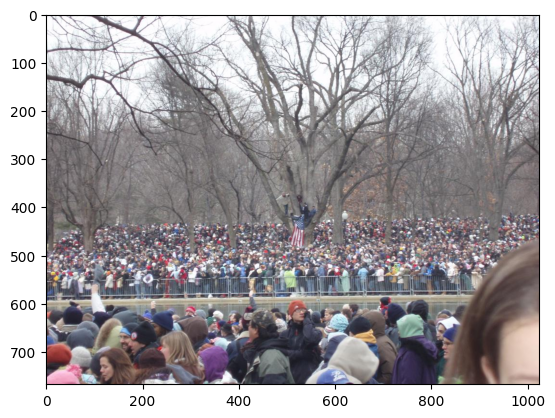

In [8]:
plt.imshow(Image.open(img_paths[0]))

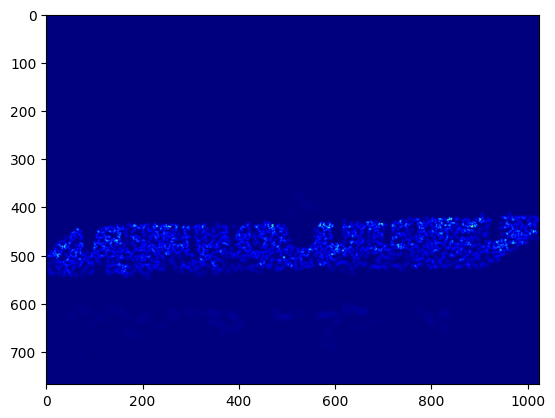

In [9]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [10]:
np.sum(groundtruth)

np.float32(1543.841)

In [11]:

path_sets = [part_B_train,part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
        
# creating density map for part_b images

for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

part_B_final/train_data\images\IMG_1.jpg
(768, 1024)
generate density...


C:\Users\abhishekgupta.AD\AppData\Local\Temp\ipykernel_61752\4212836471.py:24: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')


done.
part_B_final/train_data\images\IMG_2.jpg
(768, 1024)
generate density...
done.
part_B_final/train_data\images\IMG_3.jpg
(768, 1024)
generate density...
done.
part_B_final/train_data\images\IMG_4.jpg
(768, 1024)
generate density...
done.
part_B_final/train_data\images\IMG_5.jpg
(768, 1024)
generate density...
done.
part_B_final/test_data\images\IMG_1.jpg
(768, 1024)
generate density...
done.
part_B_final/test_data\images\IMG_2.jpg
(768, 1024)
generate density...
done.
part_B_final/test_data\images\IMG_3.jpg
(768, 1024)
generate density...
done.
part_B_final/test_data\images\IMG_4.jpg
(768, 1024)
generate density...
done.
part_B_final/test_data\images\IMG_5.jpg
(768, 1024)
generate density...
done.


In [12]:
#importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [13]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

In [14]:
#defining the location of dataset
root = '/home/pulkit/CSRNet/ShanghaiTech/CSRNet-pytorch/'
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_test]

In [15]:
img_path

'part_B_final/test_data\\images\\IMG_5.jpg'

In [5]:
import os
import glob
import h5py
import numpy as np
from PIL import Image
from torchvision import transforms
from tqdm import tqdm
import os
import glob
import h5py
import torch
import numpy as np
from PIL import Image
from tqdm import tqdm
from torchvision import transforms
from model import CSRNet  # If not already imported


# Path to test images
img_paths = sorted(glob.glob('part_A_final/test_data/images/*.jpg'))

# Define image transform (same as training)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

mae = 0.0
with torch.no_grad():
    for img_path in tqdm(img_paths):
        img = transform(Image.open(img_path).convert('RGB'))
        output = model(img.unsqueeze(0))
        predicted_count = output.sum().item()

        # Load ground truth density map
        with h5py.File(img_path.replace('.jpg', '.h5').replace('images', 'ground_truth'), 'r') as gt_file:
            groundtruth = np.asarray(gt_file['density'])
        actual_count = groundtruth.sum()

        mae += abs(predicted_count - actual_count)

print(f"Mean Absolute Error (MAE): {mae / len(img_paths):.2f}")


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]


NameError: name 'model' is not defined

In [ ]:
img_paths

In [7]:
model = model.cpu()
model.eval()

mae = 0
with torch.no_grad():
    for i in tqdm(range(len(img_paths))):
        img = transform(Image.open(img_paths[i]).convert('RGB'))
        with h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'), 'r') as gt_file:
            groundtruth = np.asarray(gt_file['density'])
        output = model(img.unsqueeze(0))
        mae += abs(output.detach().numpy().sum() - groundtruth.sum())
print(mae/len(img_paths))

NameError: name 'model' is not defined

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm as c
img = transform(Image.open('part_A_final/test_data/images/IMG_1.jpg').convert('RGB')).cpu()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('part_A_final/test_data/ground_truth/IMG_1.h5','r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('part_A_final/test_data/images/IMG_1.jpg'))
plt.show()

NameError: name 'model' is not defined